# Correlation based feature selection

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [65]:
#EasyPark data
data = pd.read_csv('easypark_data.csv')
data = data[data.columns.values[2:]]

data.head()

Smart Parking  Car Sharing Services  Traffic  Public Transport  \
0           8.22                  2.06     8.71              4.18   
1           8.50                  3.34     8.71              2.44   
2           6.44                  4.93     9.02              9.02   
3           5.13                  3.27     6.67              9.55   
4           9.91                  8.87     8.87              3.34   

   E-Charge Spots  Infrastructure Investment  Clean Energy  Smart Building  \
0            2.51                       7.88          8.54            6.75   
1            2.59                       7.88          8.54            6.75   
2            6.37                       8.03          1.15            2.36   
3            5.76                       7.50          2.77            6.29   
4            8.26                       5.99          1.92            6.82   

   Waste Disposal  Environment Protection  ...  Blockchain ecosystem  4G LTE  \
0            8.25                    8.71  ...                  1.31    8.26   
1            8.25                    7.66  ...                  1.31    6.14   
2            2.60                    2.74  ...                  2.17    5.69   
3            4.20                    2.59  ...                  2.64    6.45   
4            8.93                    4.93  ...                  9.22    8.18   

   Internet speed  Wifi Hotspots  Smartphone Penetration  Cyber security  \
0            7.96           1.91                    9.69            7.20   
1            5.08           2.36                    9.69            7.20   
2            1.98           6.75                    9.31            2.13   
3            2.36           4.93                    4.97            9.62   
4            6.75           6.97                    6.49            7.28   

   Living Standard  Expert Perception  Rank/Score  IMD Smart City Index  
0             8.11               6.57        6.94                   NaN  
1             7.20               6.57        6.42                   NaN  
2             6.22               9.47        5.60                  56.0  
3             7.58               9.16        6.07                   NaN  
4             7.43              10.00        7.55                  11.0  

[5 rows x 26 columns]

In [50]:
X = imd_ranked_df[imd_ranked_df.columns.values[:-3]]
expert_Y = imd_ranked_df[imd_ranked_df.columns.values[-3]]

In [51]:
reg = LinearRegression()
reg.fit(X, expert_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Correlation based on Expert Perception

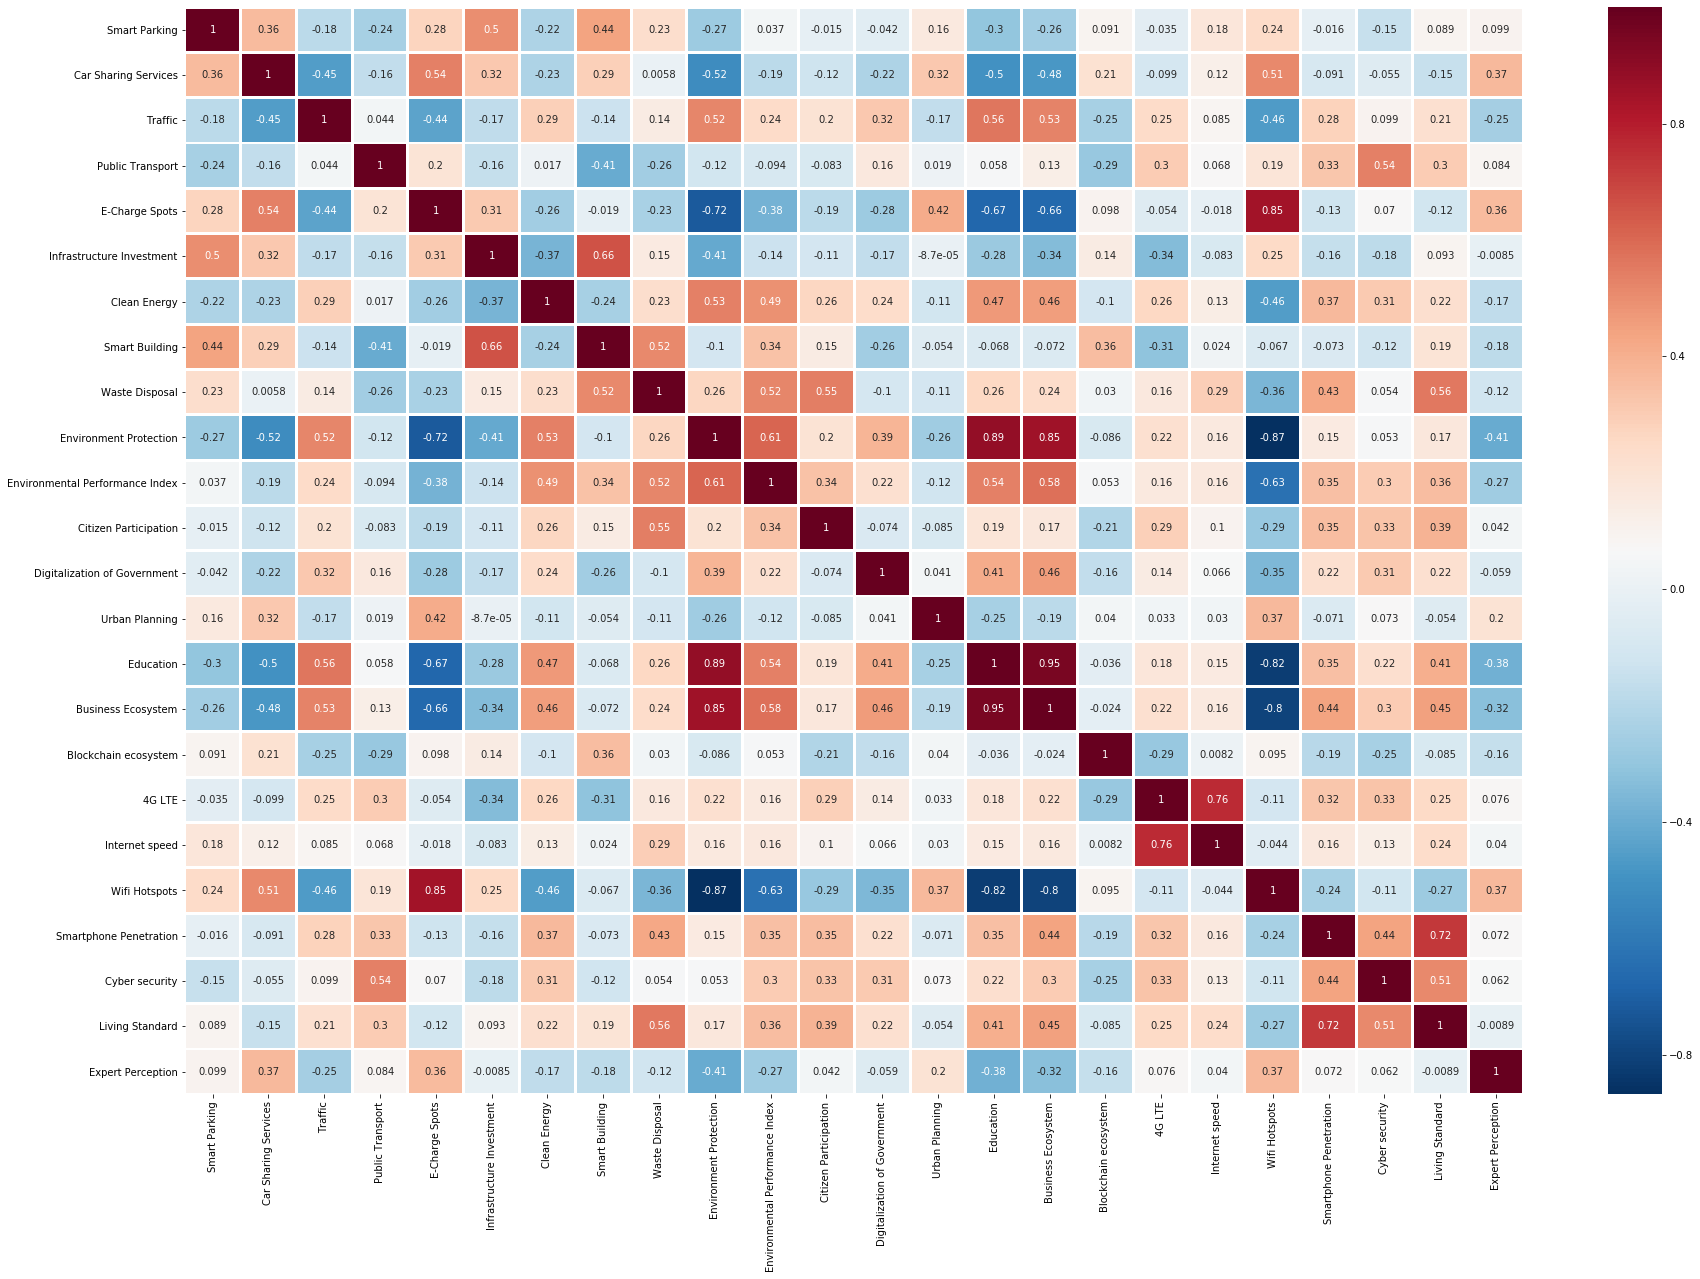

In [74]:
exp_df = data[data.columns.values[:-2]]
corr = exp_df.corr()

plt.figure(figsize = (30,20))

sb.heatmap( corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=2)
plt.show()

In [82]:
#Finding relevant features based on co-relation threshold of 0.2 between features and Expert Perception
target_value = abs(corr["Expert Perception"])

relevant_features = target_value[target_value>0.2]
relevant_features[:-1]

Car Sharing Services               0.365832
Traffic                            0.252873
E-Charge Spots                     0.364135
Environment Protection             0.407973
Environmental Performance Index    0.268598
Urban Planning                     0.200839
Education                          0.382568
Business Ecosystem                 0.322104
Wifi Hotspots                      0.370524
Name: Expert Perception, dtype: float64

## Correlation based on Rank

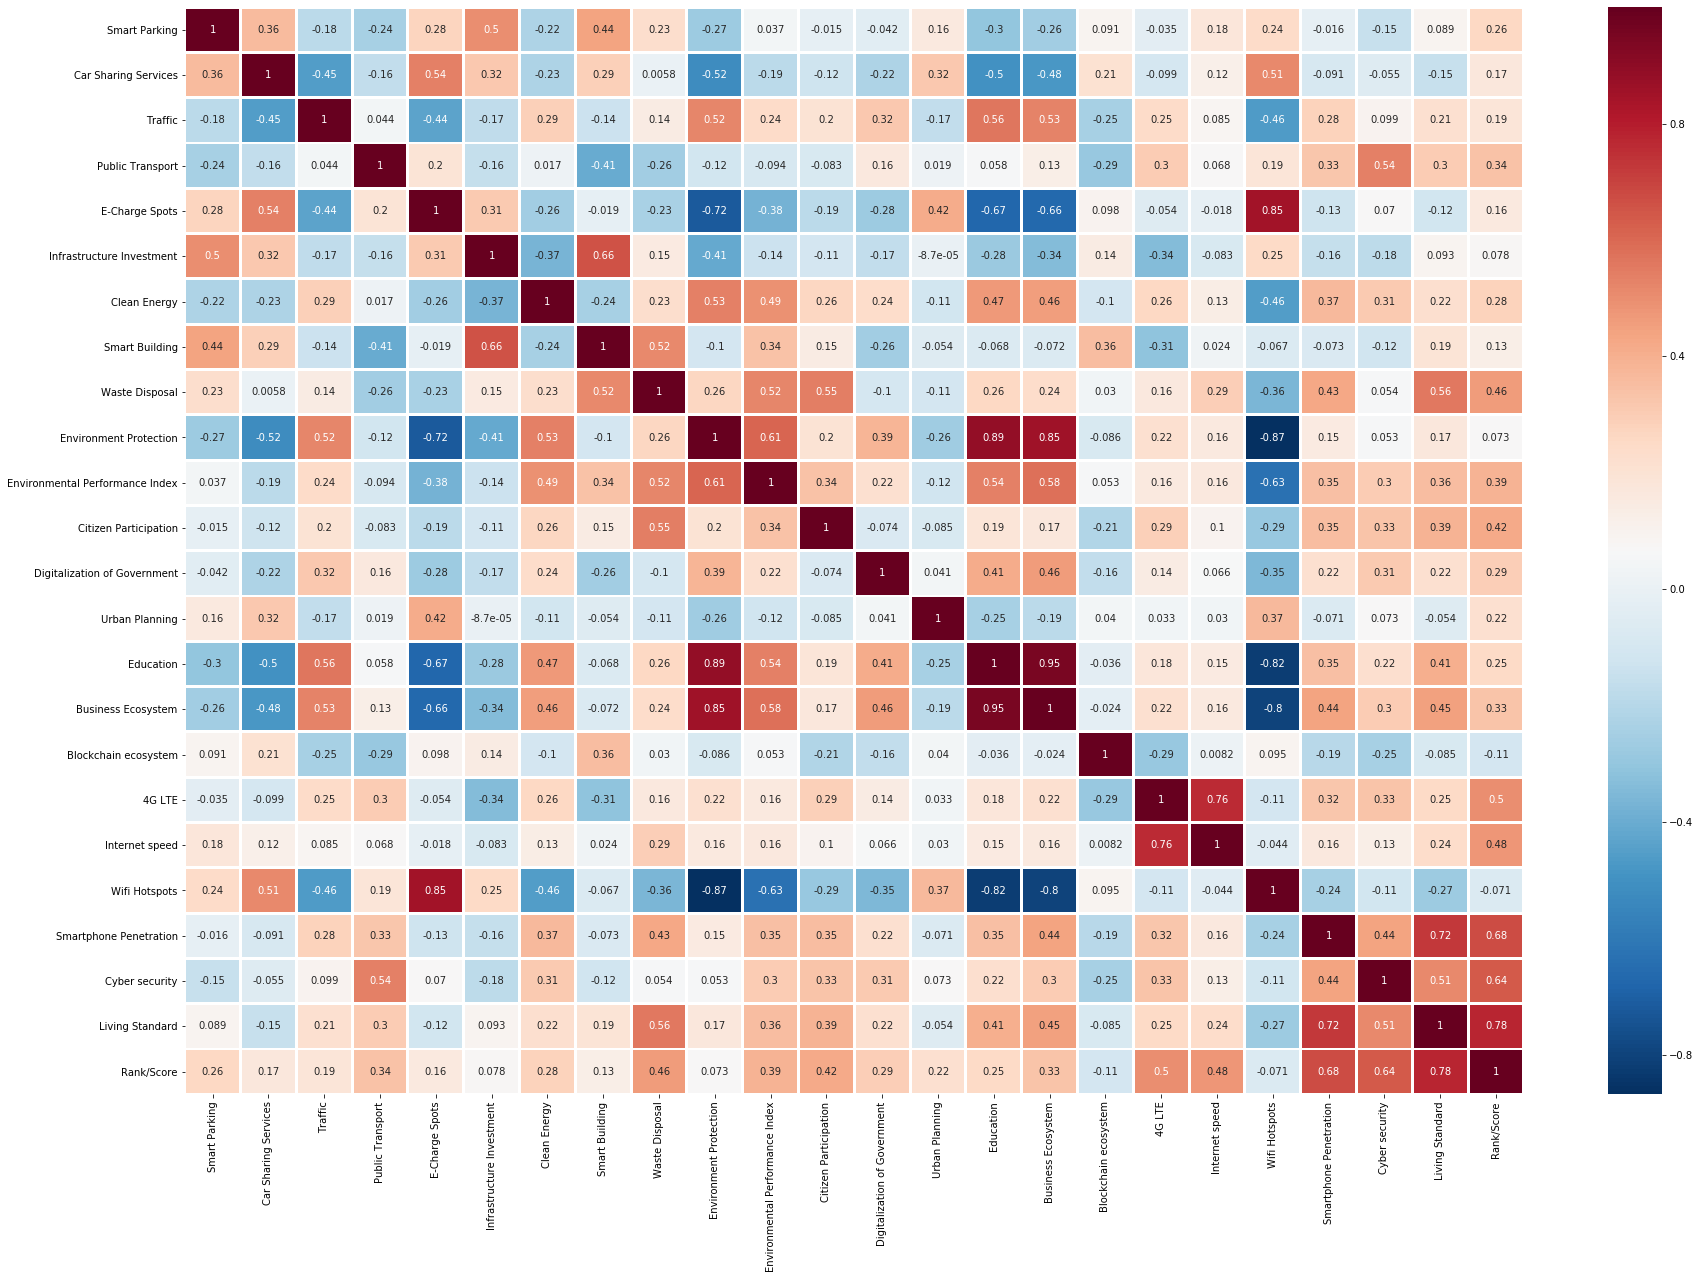

In [84]:
rank_df = data[data.columns.values[:-1]]
rank_df = rank_df.drop(columns=["Expert Perception"])

rank_corr = rank_df.corr()

plt.figure(figsize = (30,20))

sb.heatmap( rank_corr, 
            xticklabels=rank_corr.columns,
            yticklabels=rank_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=2)
plt.show()

In [90]:
#Finding relevant features based on co-relation between other features and Rank with a threshold of 0.3 
target_value = abs(rank_corr["Rank/Score"])

relevant_features = target_value[target_value>0.3]
relevant_features[:-1]

Public Transport                   0.337156
Waste Disposal                     0.464109
Environmental Performance Index    0.391391
Citizen Participation              0.419229
Business Ecosystem                 0.331993
4G LTE                             0.498087
Internet speed                     0.480653
Smartphone Penetration             0.676554
Cyber security                     0.636415
Living Standard                    0.775135
Name: Rank/Score, dtype: float64

## Correlation based on IMD ranks

In [66]:
imd_ranked_df = data.dropna()
imd_ranked_df.head()

Smart Parking  Car Sharing Services  Traffic  Public Transport  \
2            6.44                  4.93     9.02              9.02   
4            9.91                  8.87     8.87              3.34   
6            2.78                  4.18     2.89              9.77   
7           10.00                  6.97     4.63              1.61   
10           8.22                  9.39     1.30              7.96   

    E-Charge Spots  Infrastructure Investment  Clean Energy  Smart Building  \
2             6.37                       8.03          1.15            2.36   
4             8.26                       5.99          1.92            6.82   
6             7.73                       2.13          9.62            2.89   
7             5.61                       4.71          6.08            5.69   
10            8.79                      10.00          4.54            5.39   

    Waste Disposal  Environment Protection  ...  Blockchain ecosystem  4G LTE  \
2             2.60                    2.74  ...                  2.17    5.69   
4             8.93                    4.93  ...                  9.22    8.18   
6             3.90                    3.19  ...                  2.02    9.02   
7             5.27                    3.65  ...                  8.90    2.36   
10            1.84                    1.91  ...                  8.36    3.65   

    Internet speed  Wifi Hotspots  Smartphone Penetration  Cyber security  \
2             1.98           6.75                    9.31            2.13   
4             6.75           6.97                    6.49            7.28   
6             8.34           8.71                    5.35            9.17   
7             3.19           3.87                    5.12            2.74   
10            5.01           9.85                    2.22            1.98   

    Living Standard  Expert Perception  Rank/Score  IMD Smart City Index  
2              6.22               9.47        5.60                  56.0  
4              7.43              10.00        7.55                  11.0  
6              3.34               6.57        5.81                   6.0  
7              2.06              10.00        4.83                  48.0  
10             1.00               3.14        4.21                  60.0  

[5 rows x 26 columns]

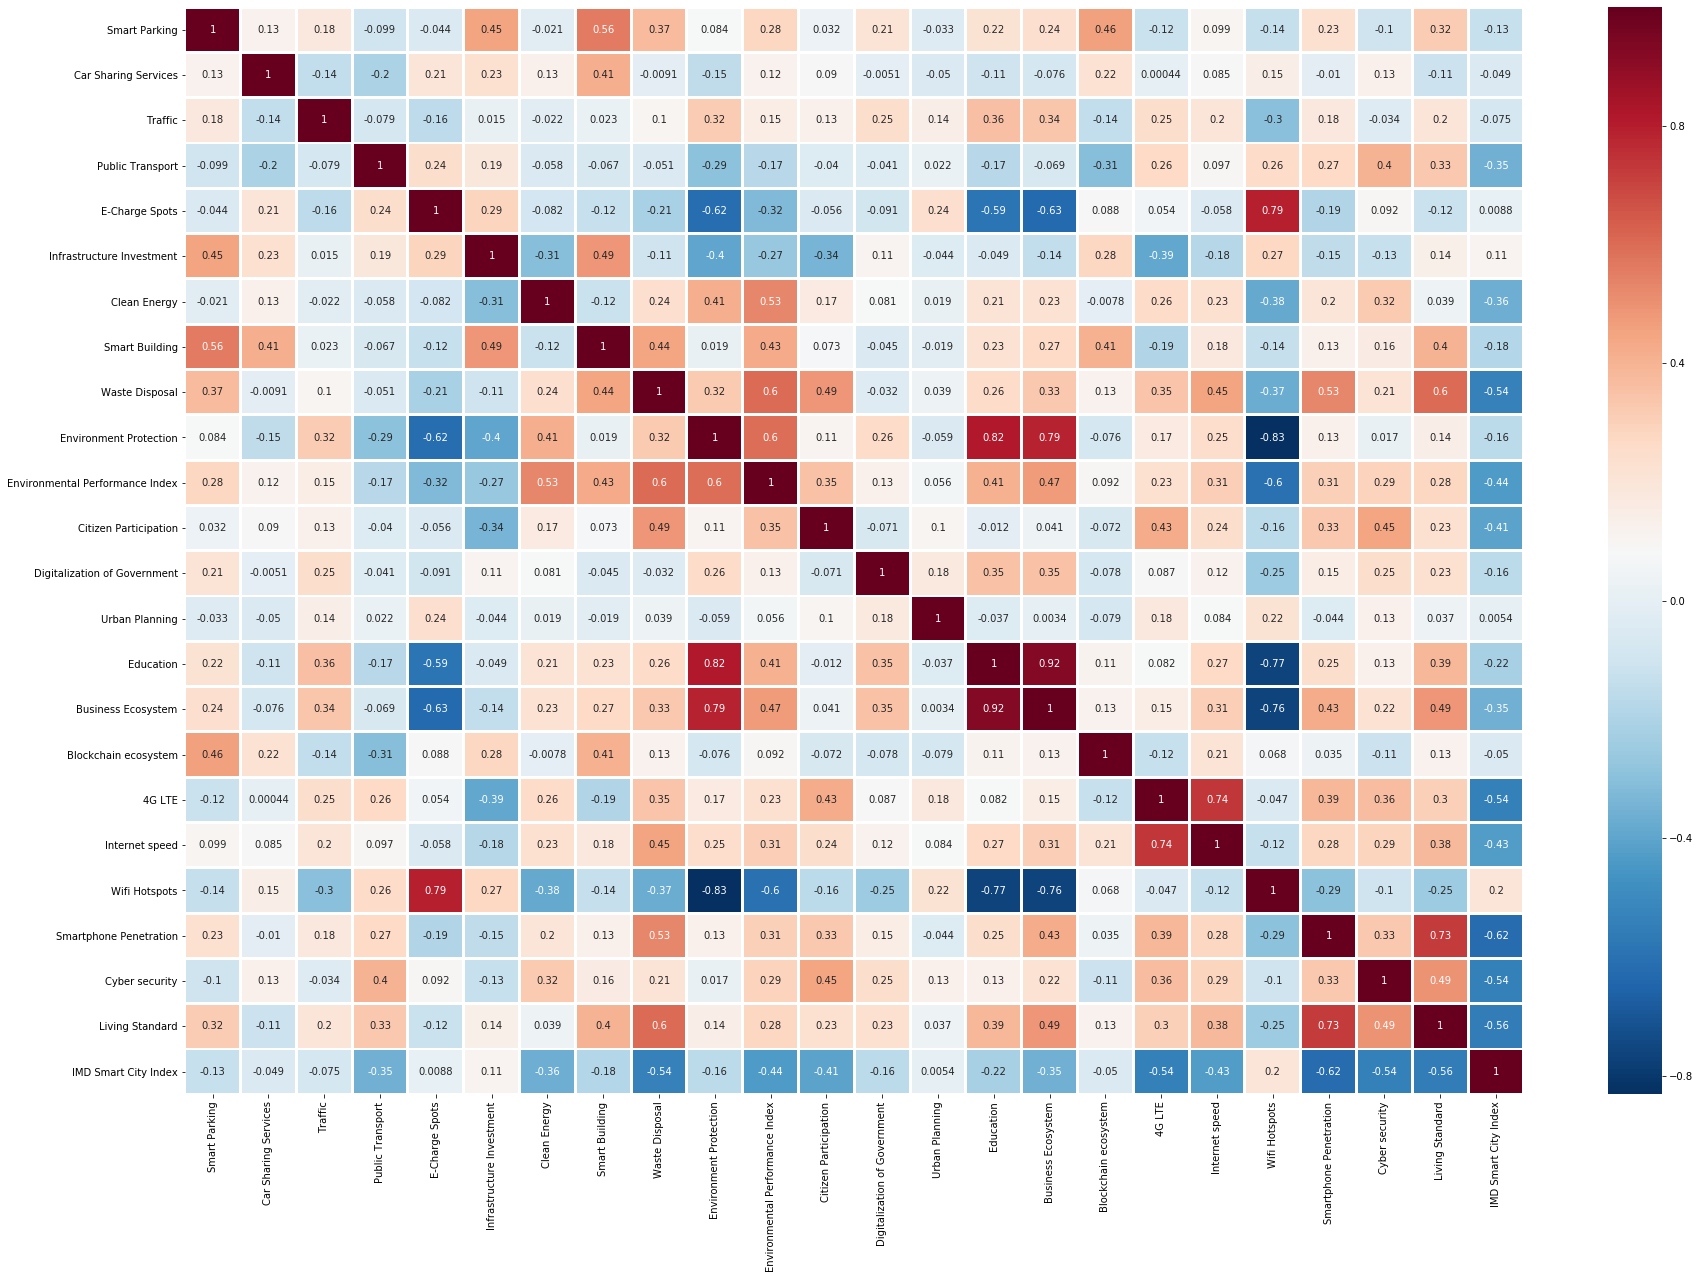

In [91]:
imd_df = imd_ranked_df.drop(columns=["Expert Perception", "Rank/Score"])
imd_corr = imd_df.corr()

plt.figure(figsize = (30,20))

sb.heatmap( imd_corr, 
            xticklabels=imd_corr.columns,
            yticklabels=imd_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=2)
plt.show()

In [95]:
#Finding relevant features based on co-relation between other features and Rank with a threshold of 0.3 
target_value = abs(imd_corr["IMD Smart City Index"])

relevant_features = target_value[target_value>0.3]
relevant_features[:-1]

Public Transport                   0.352748
Clean Energy                       0.359757
Waste Disposal                     0.536631
Environmental Performance Index    0.435792
Citizen Participation              0.406557
Business Ecosystem                 0.352360
4G LTE                             0.538309
Internet speed                     0.428408
Smartphone Penetration             0.622115
Cyber security                     0.543884
Living Standard                    0.556109
Name: IMD Smart City Index, dtype: float64